# MNIST Data Reading and Processing

In [175]:
from sklearn.datasets import fetch_mldata
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

from nltk.cluster.kmeans import KMeansClusterer

import ot

In [176]:
mnist = fetch_mldata('MNIST original')

In [177]:
norm_mnist = mnist.data / mnist.data.sum(axis=1)[:, np.newaxis]

In [178]:
type(mnist.data)

numpy.ndarray

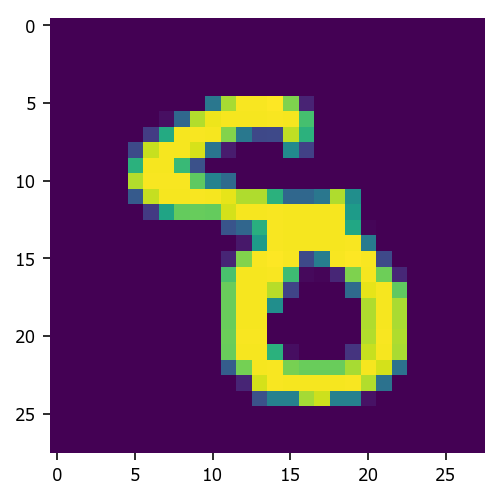

In [179]:
plt.imshow(mnist.data[50000,:].reshape([28, -1]))

In [19]:
sample_n = 100
sample = np.random.choice(range(len(mnist.target)), sample_n)

In [181]:
x, y = np.meshgrid(range(28), range(28))

In [182]:
%%time
d = np.sqrt((x[:, :, np.newaxis, np.newaxis] - x)**2 + (y[:, :, np.newaxis, np.newaxis] - y)**2)
d_flat = d.reshape([28**2, 28**2])

CPU times: user 14.5 ms, sys: 27.4 ms, total: 41.9 ms
Wall time: 41.8 ms


In [131]:
cluster_d = np.zeros((sample_n, sample_n))

In [32]:
for i in tqdm(range(sample_n)):
    for j in range(sample_n):
        move, res = ot.lp.emd(norm_mnist[sample[i],:], norm_mnist[sample[j],:], d_flat, log=True)
        cluster_d[i,j] = res['cost']

HBox(children=(IntProgress(value=0), HTML(value='')))

/anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


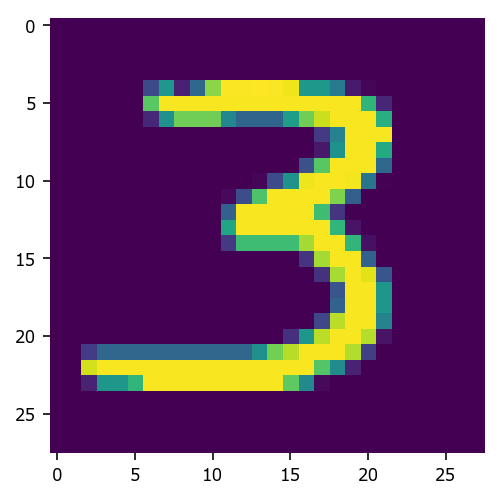

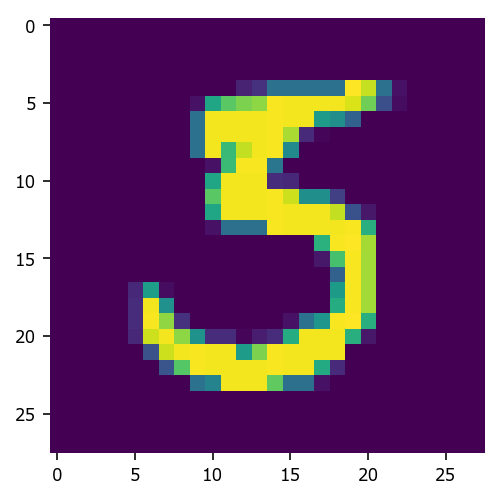

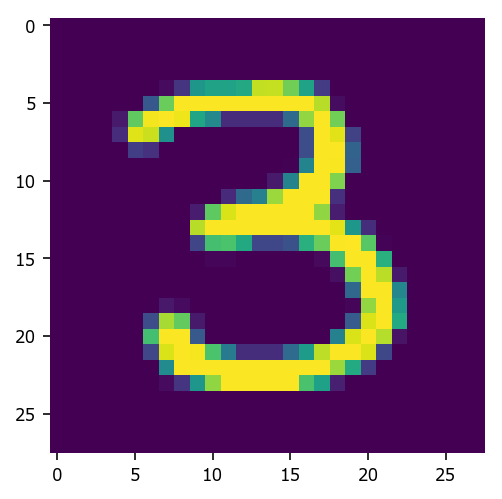

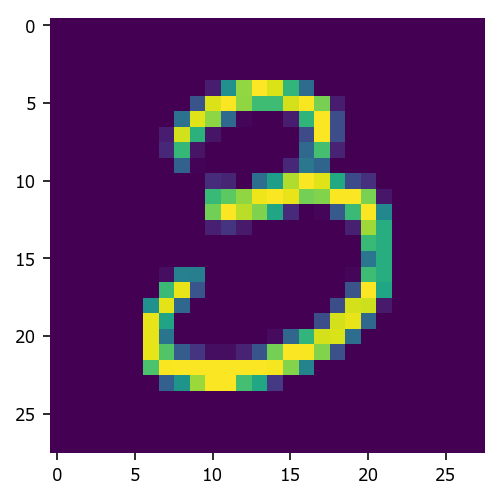

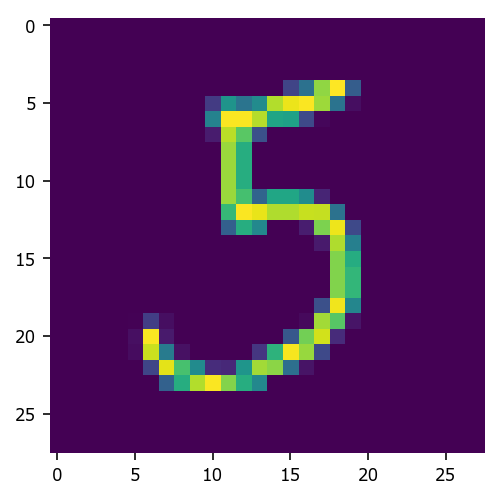

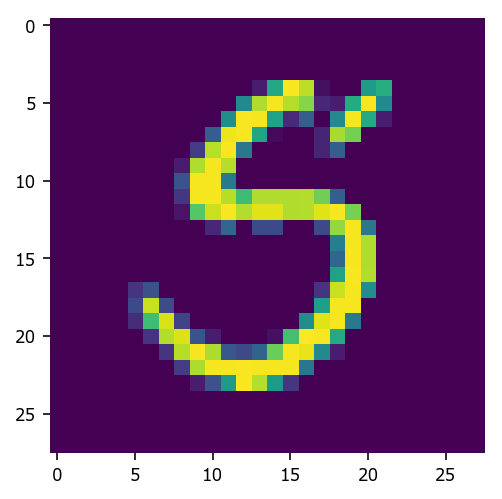

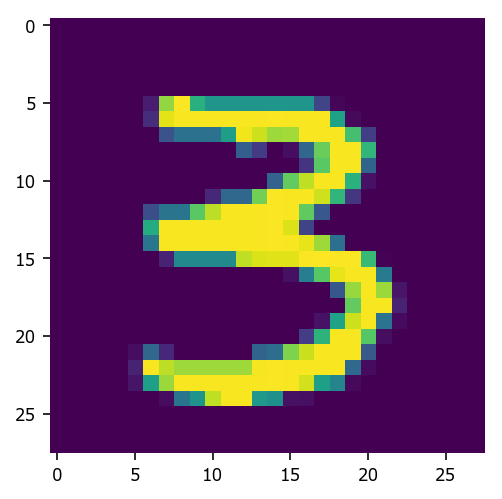

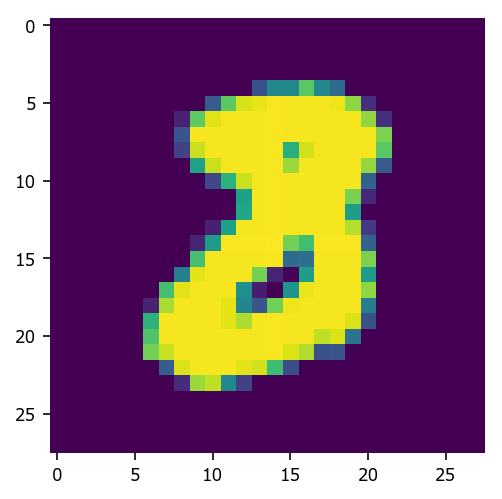

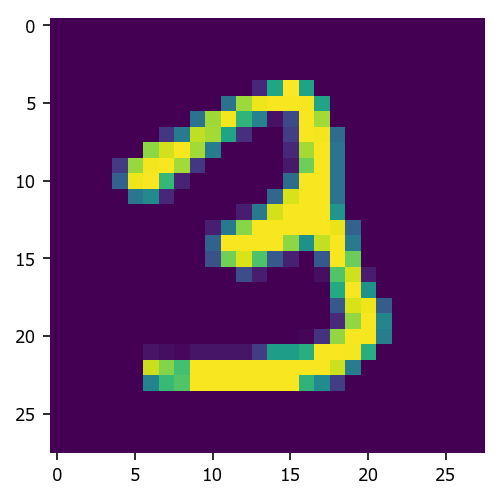

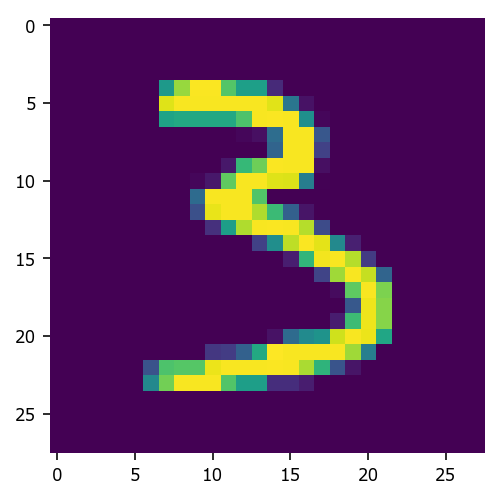

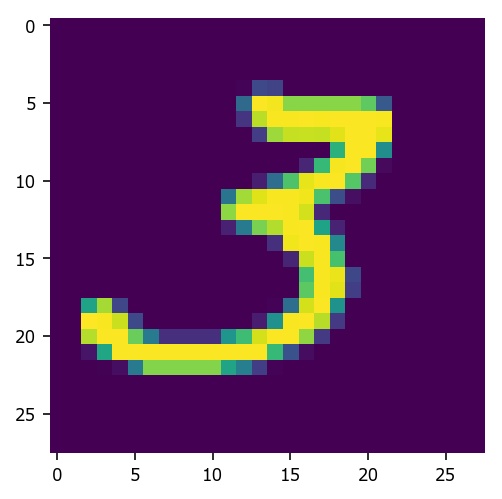

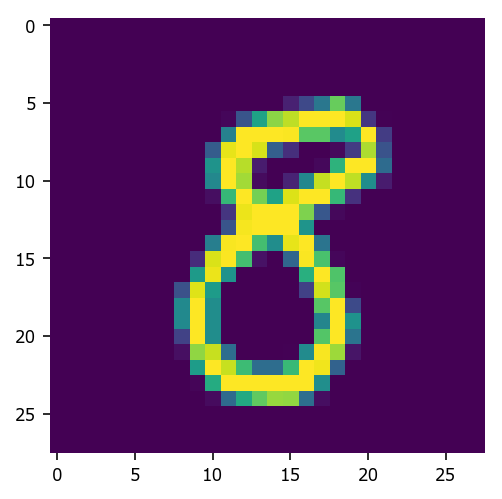

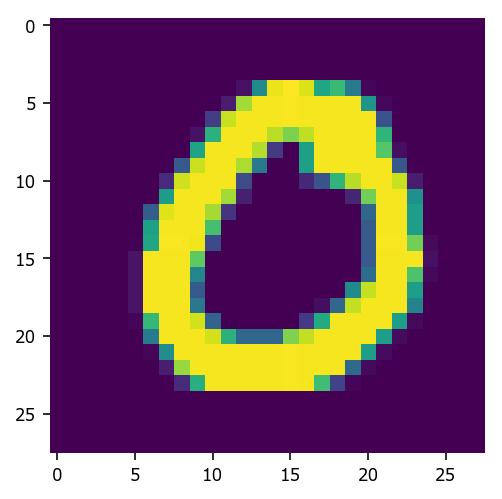

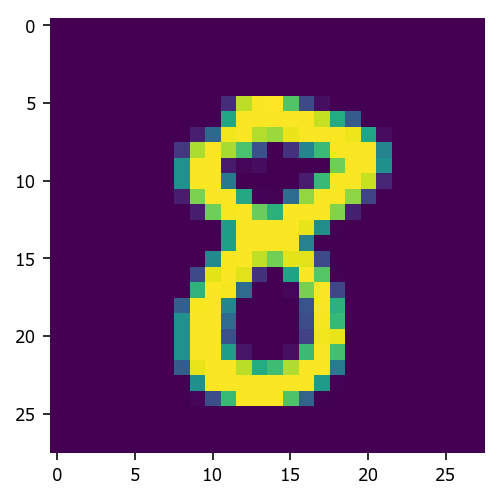

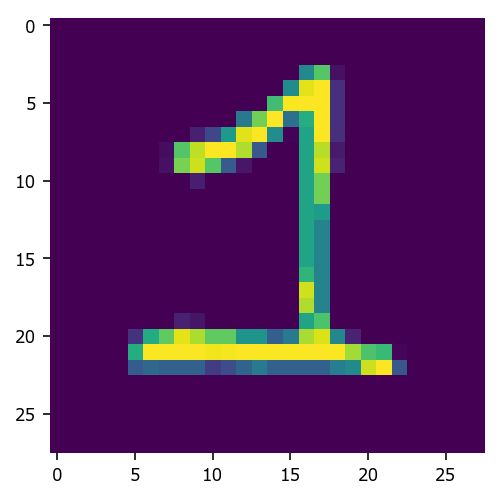

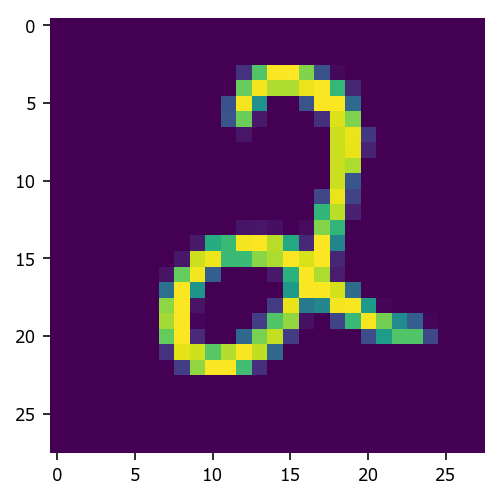

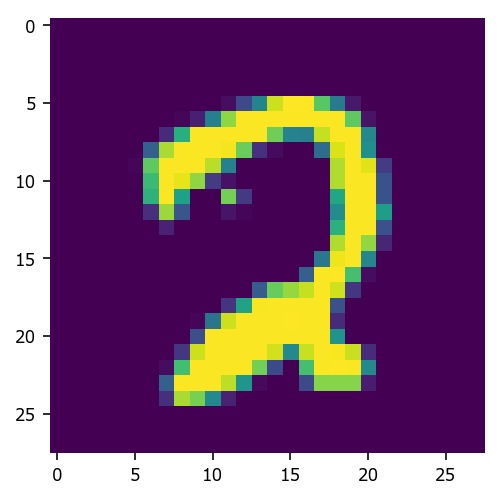

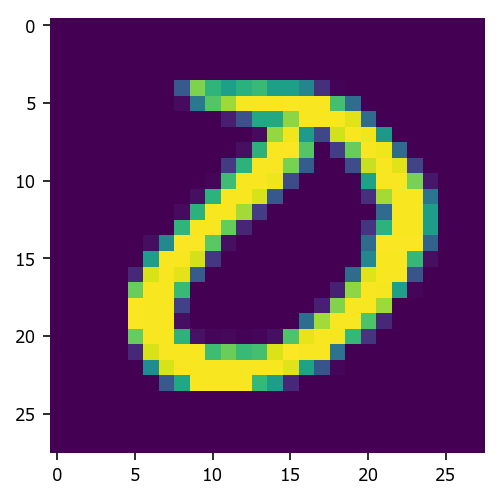

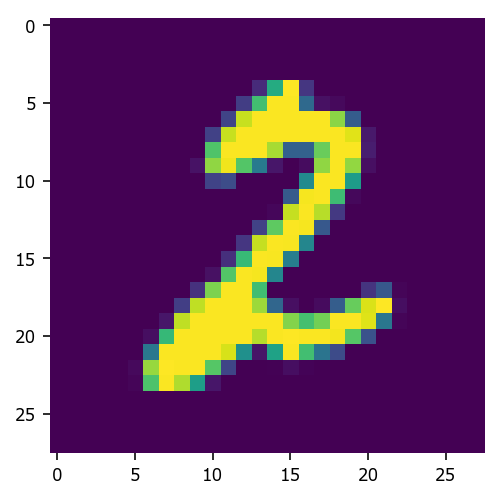

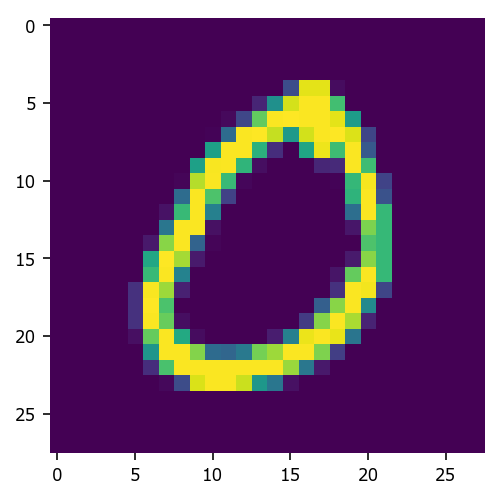

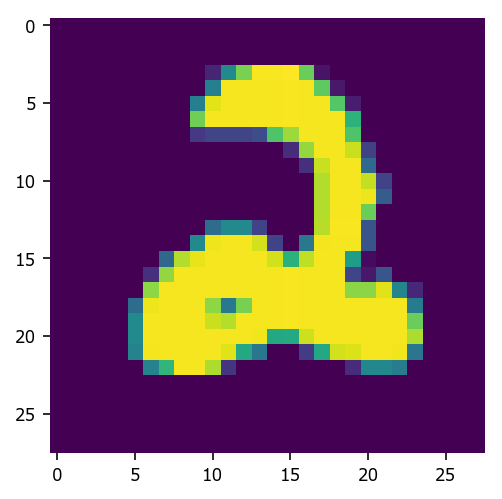

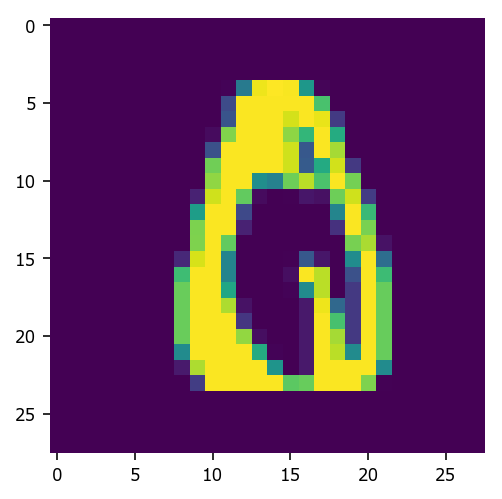

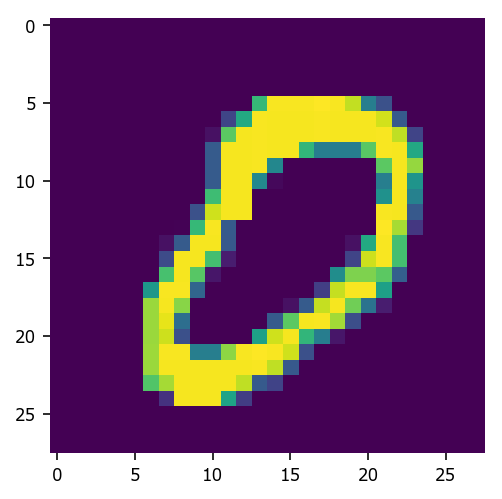

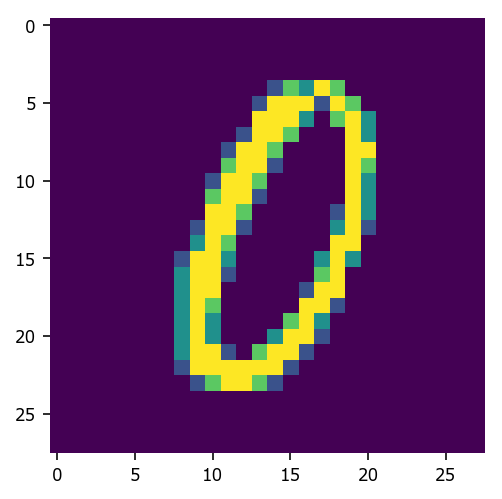

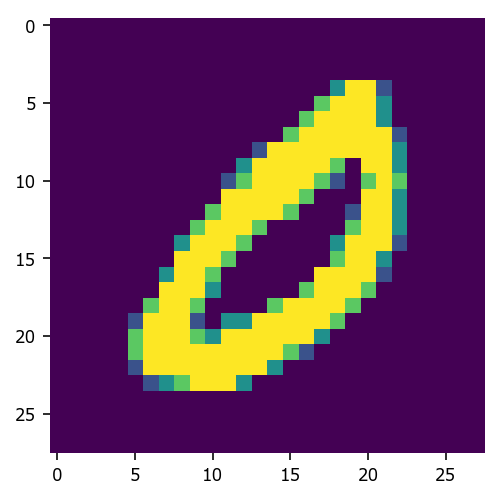

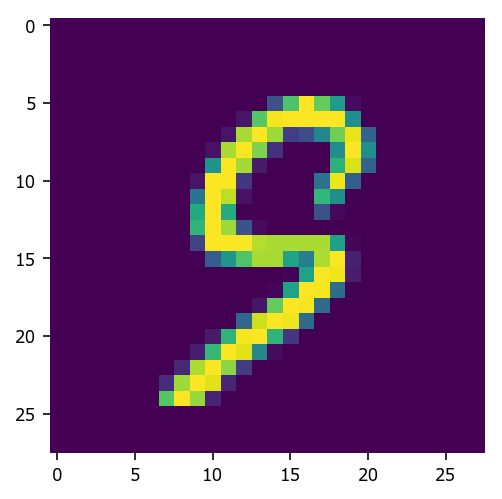

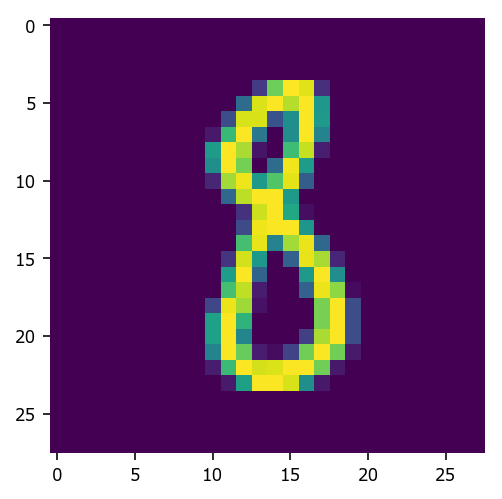

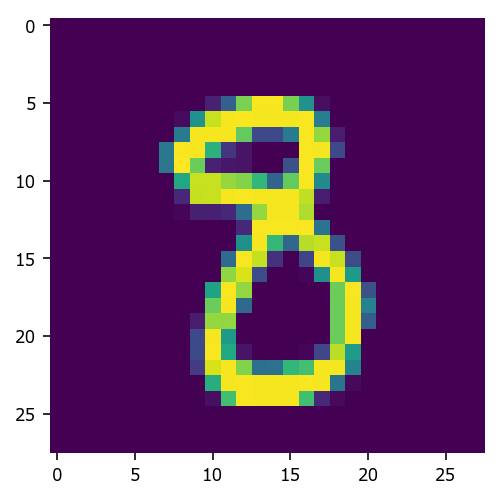

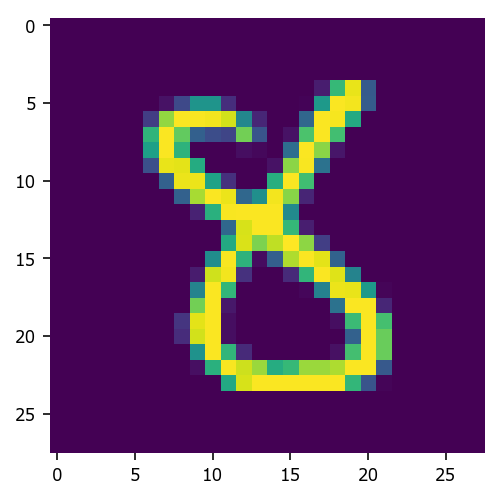

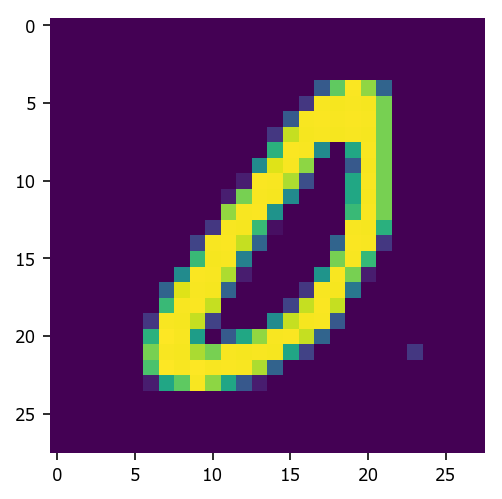

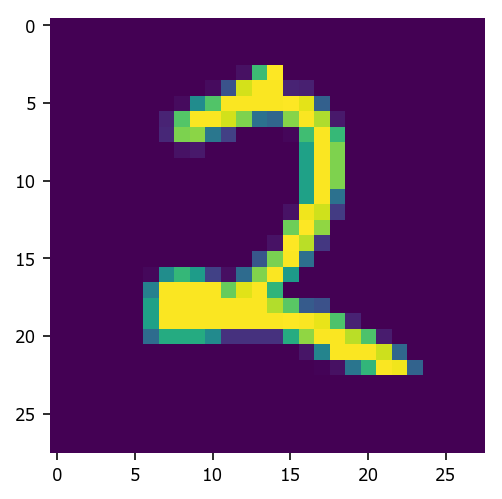

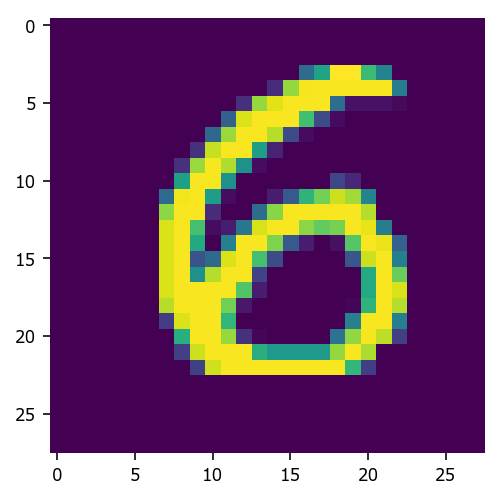

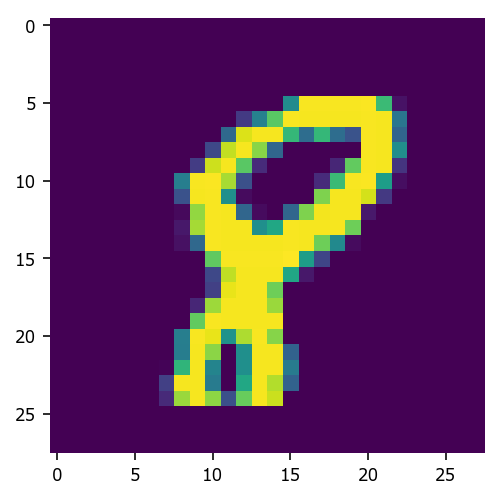

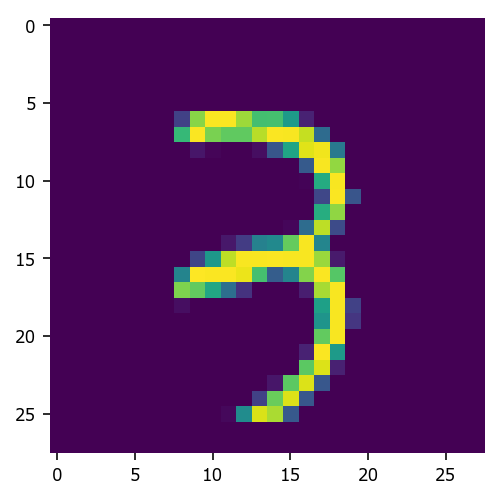

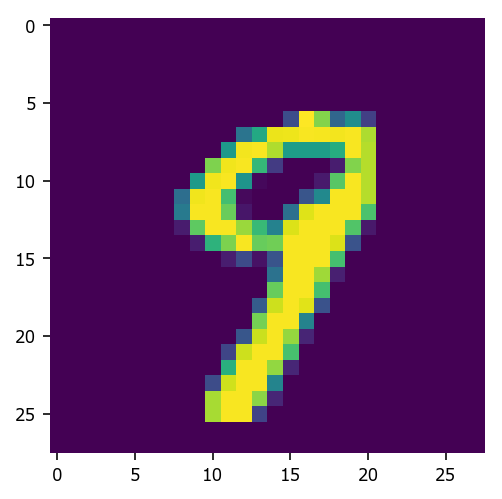

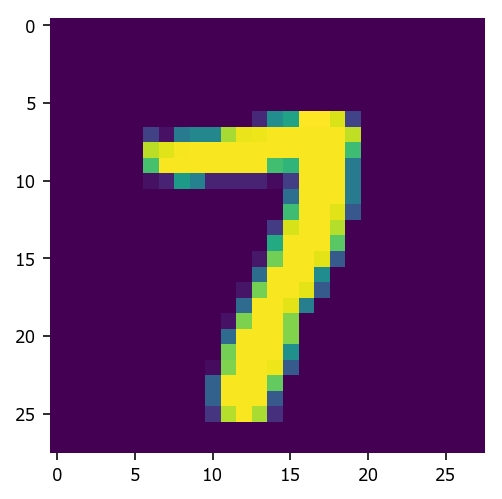

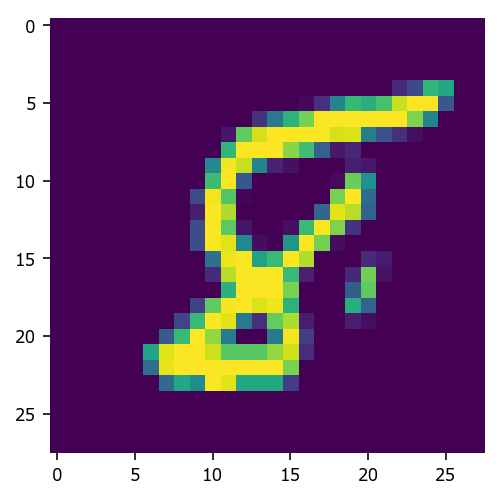

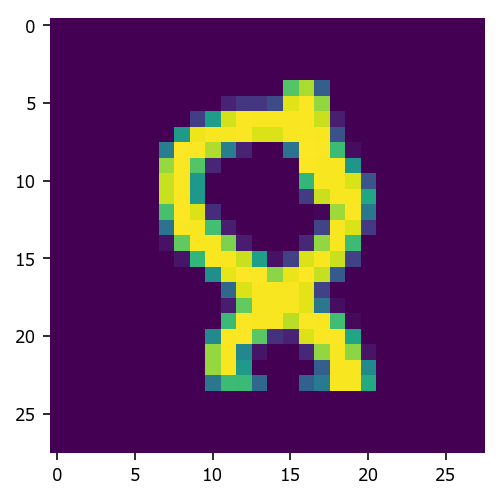

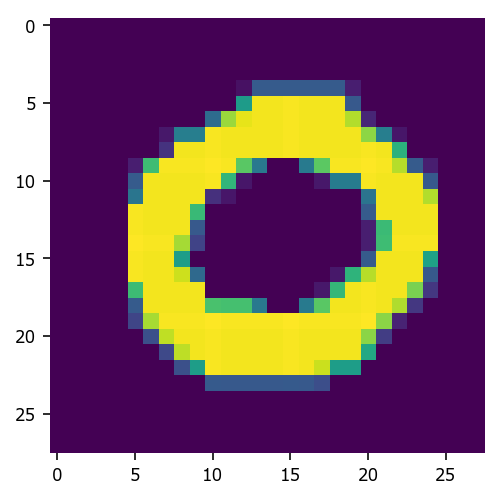

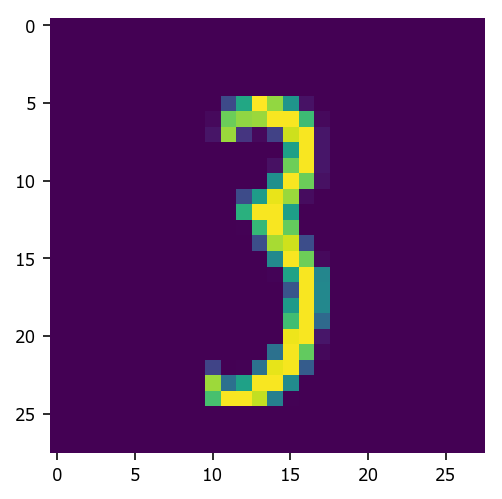

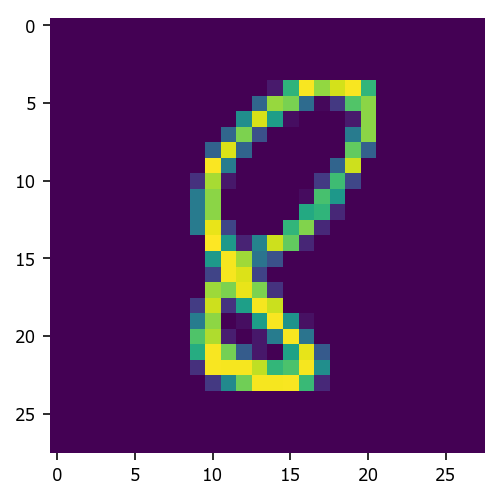

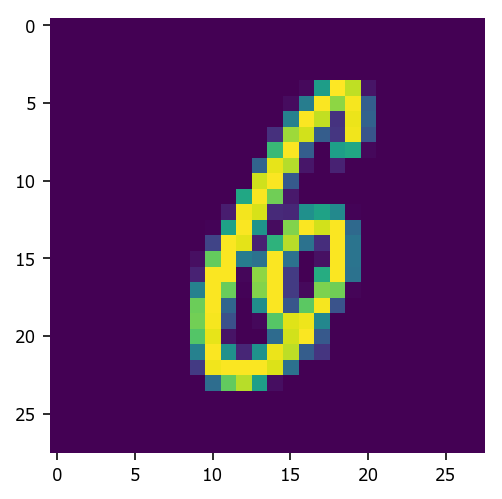

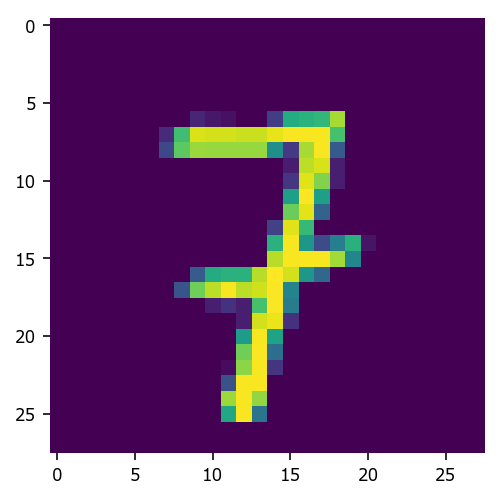

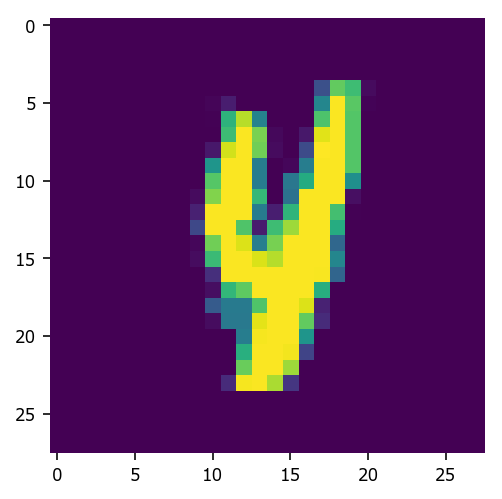

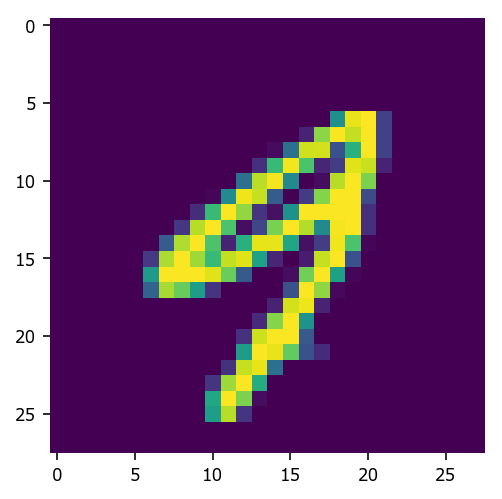

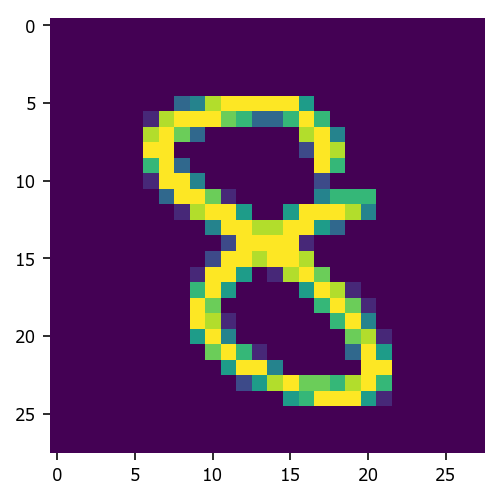

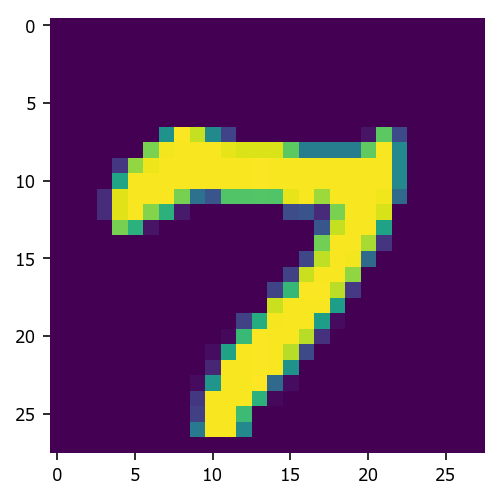

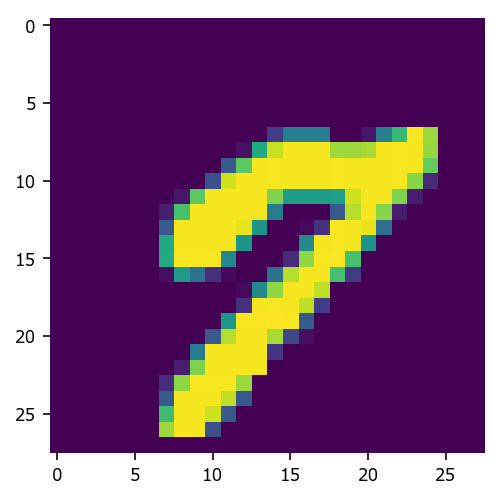

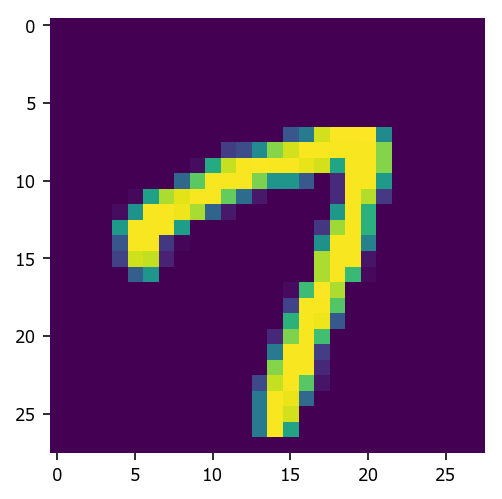

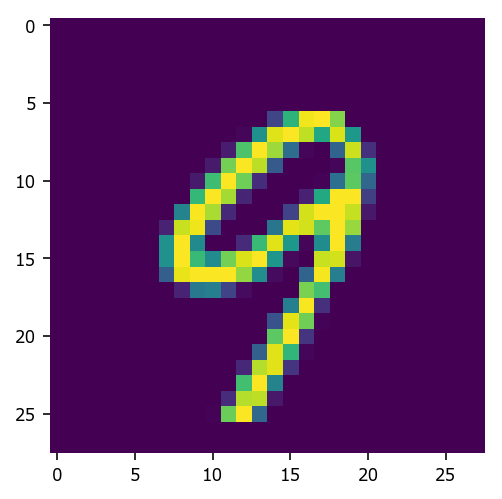

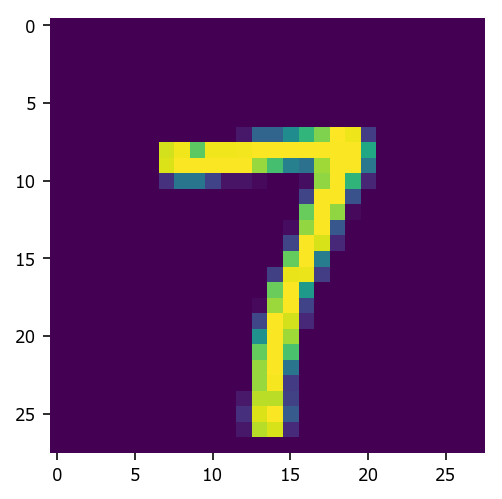

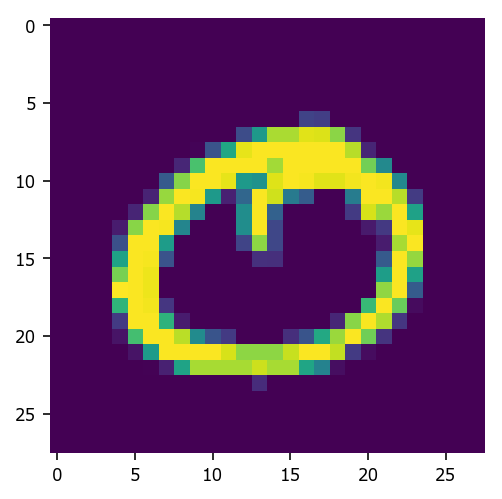

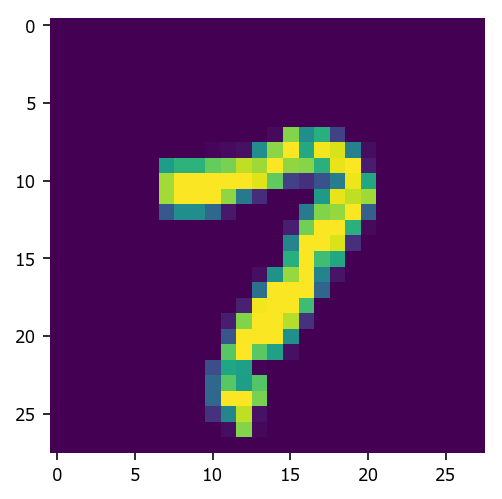

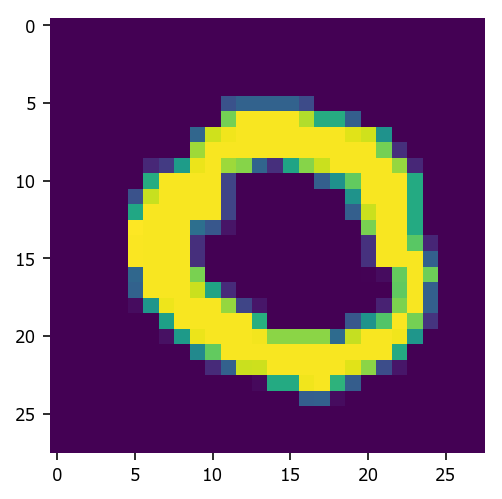

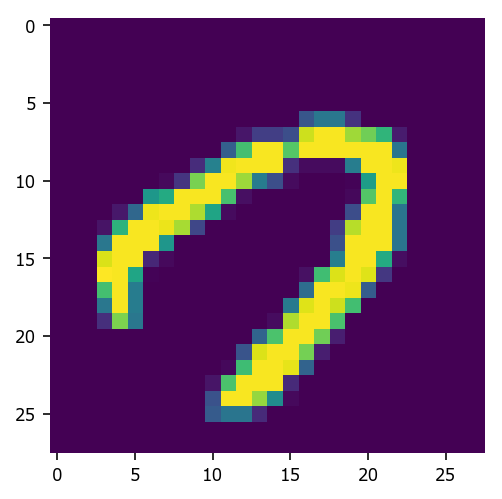

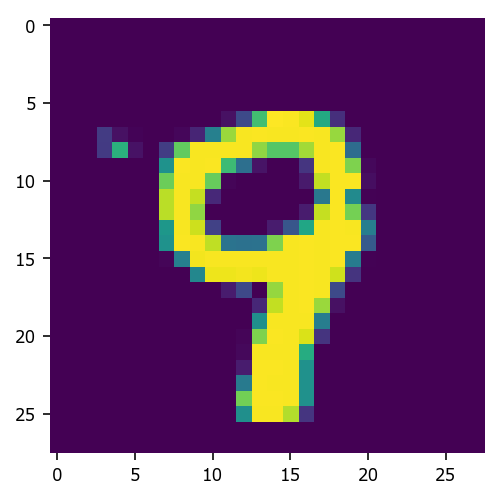

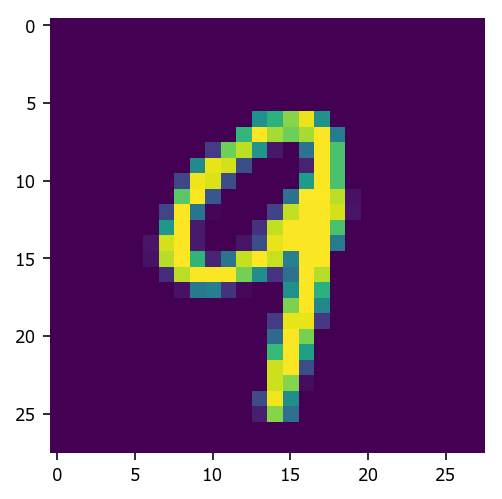

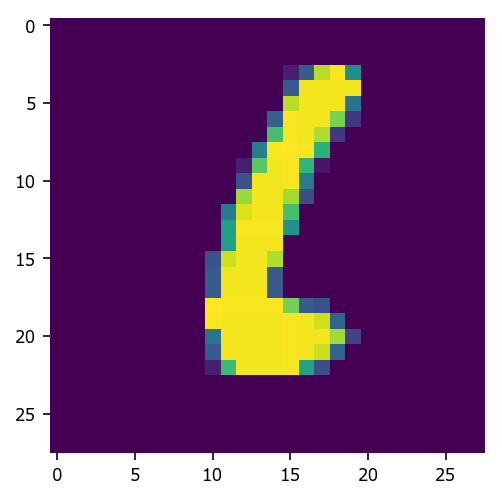

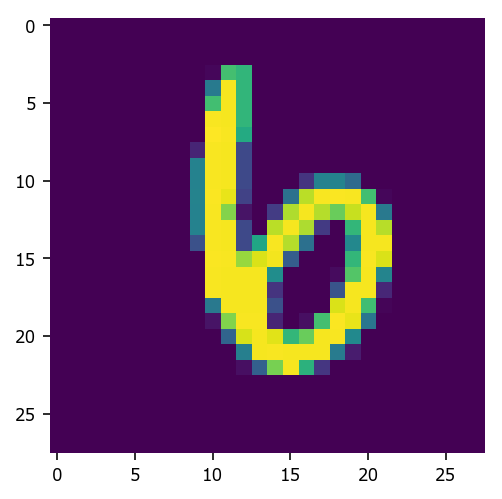

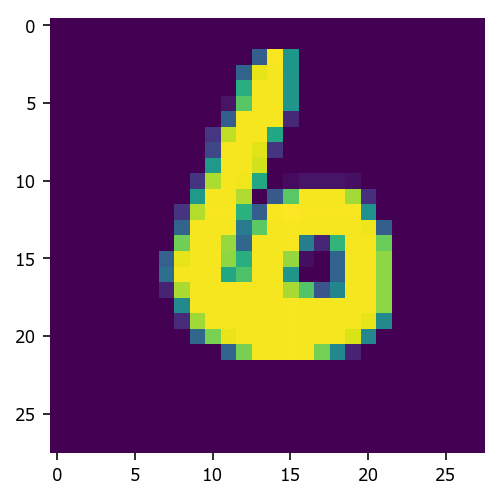

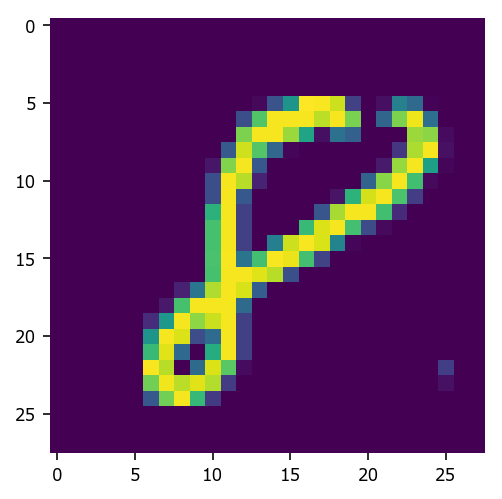

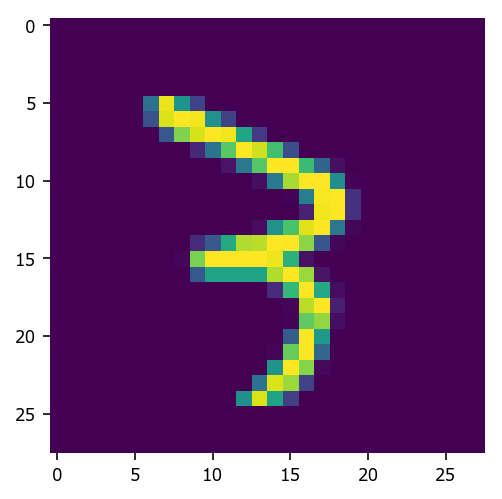

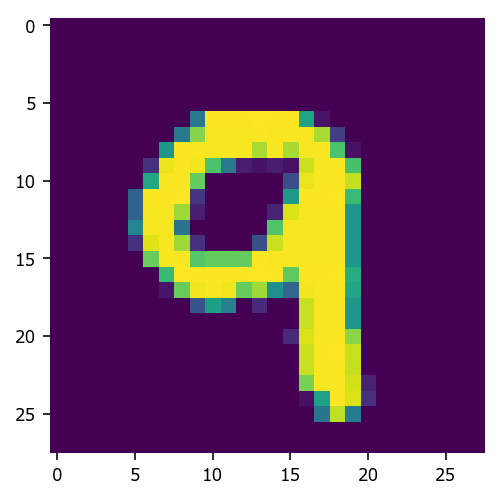

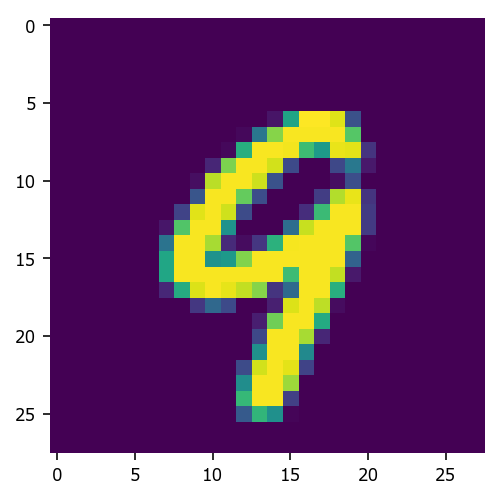

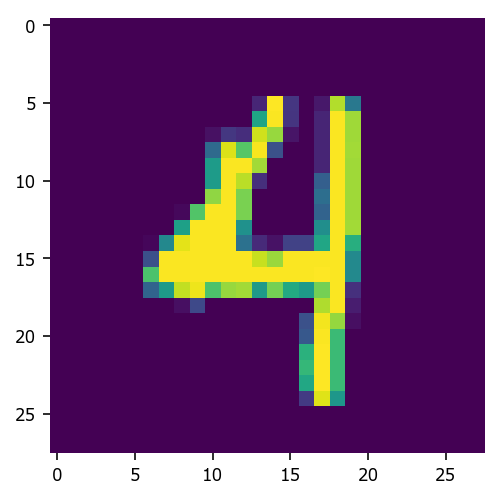

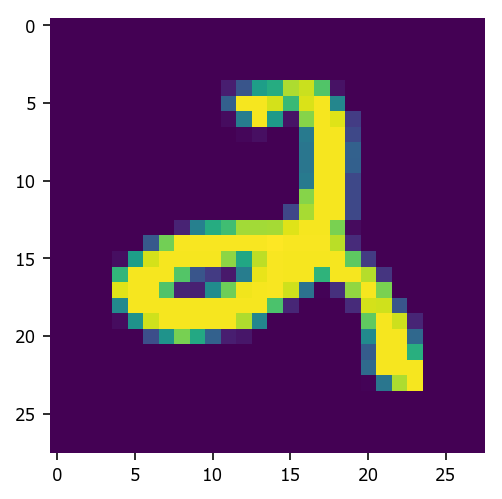

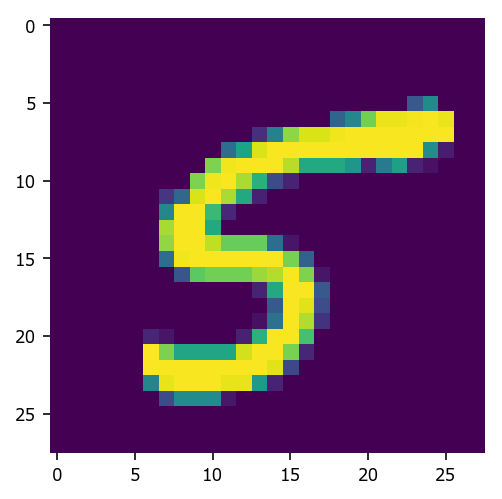

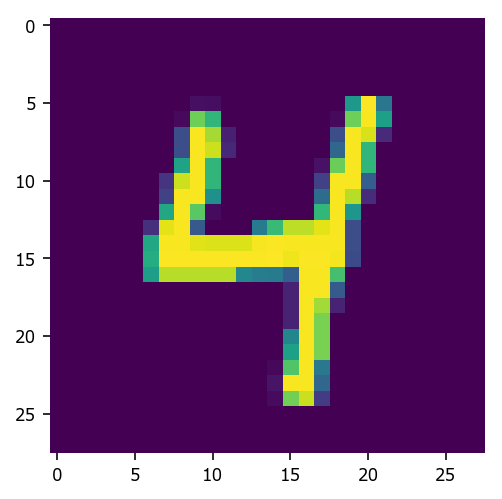

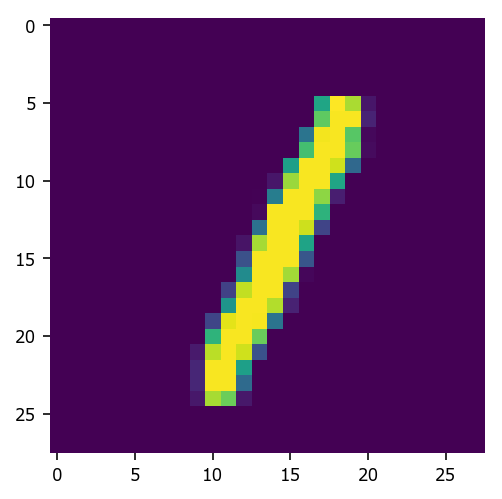

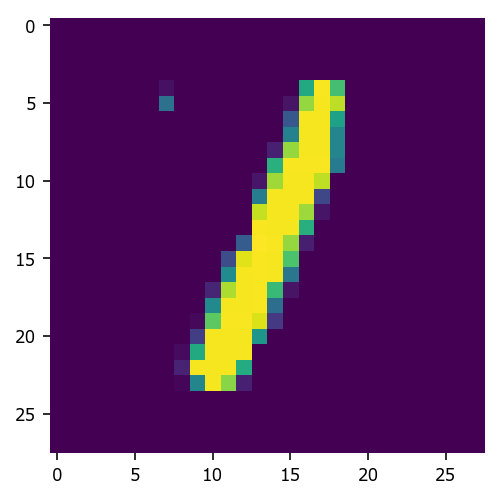

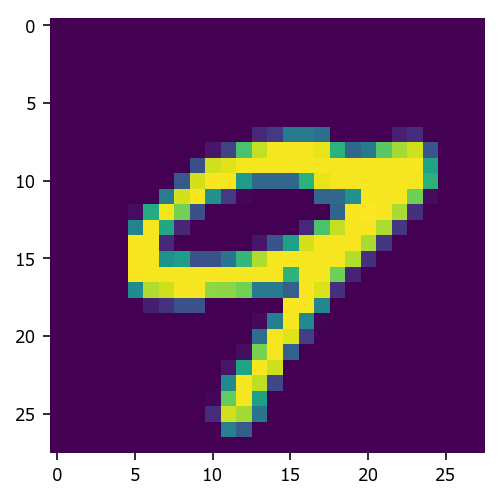

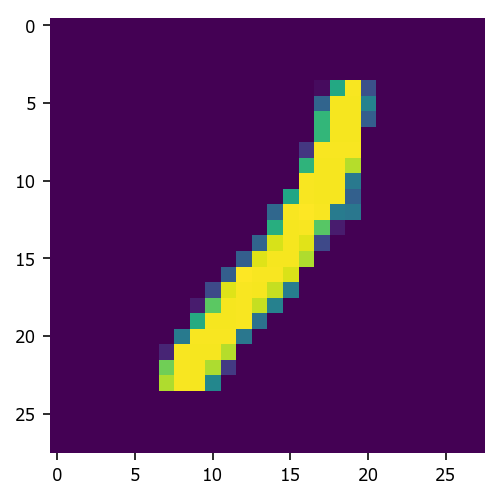

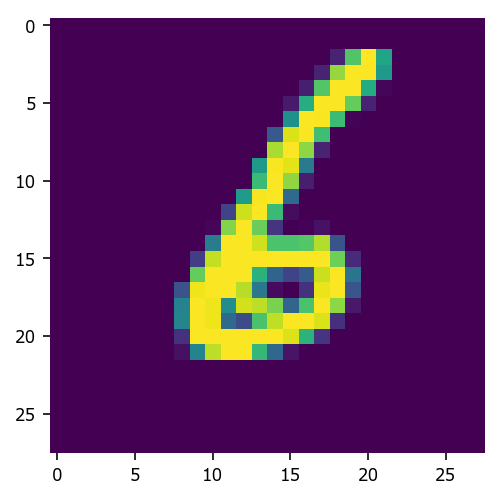

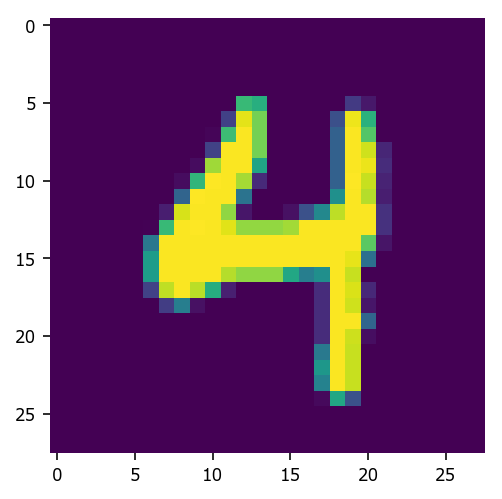

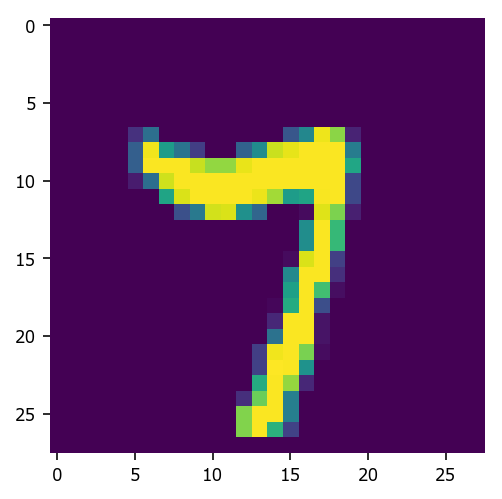

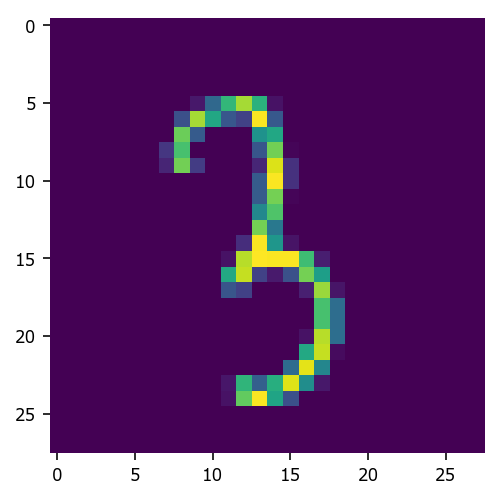

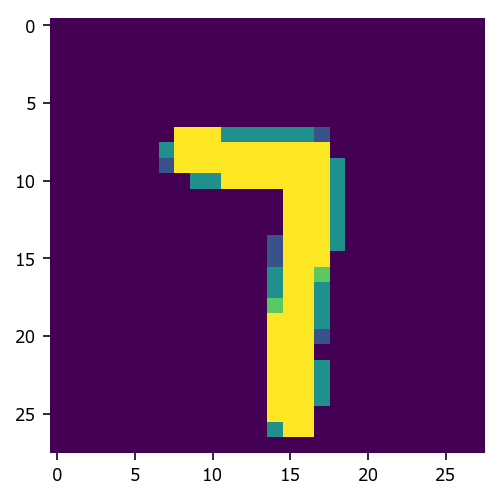

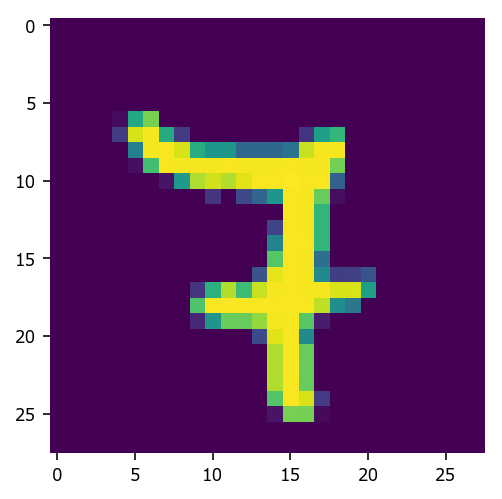

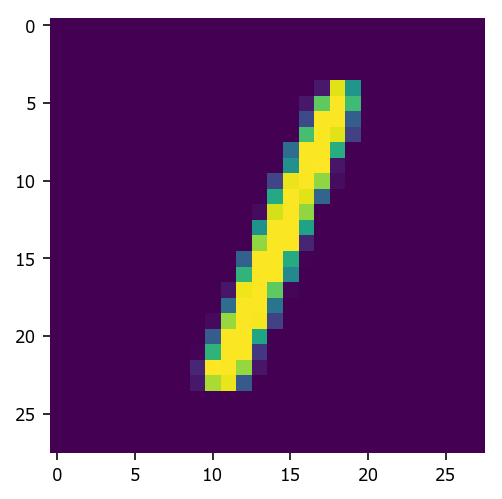

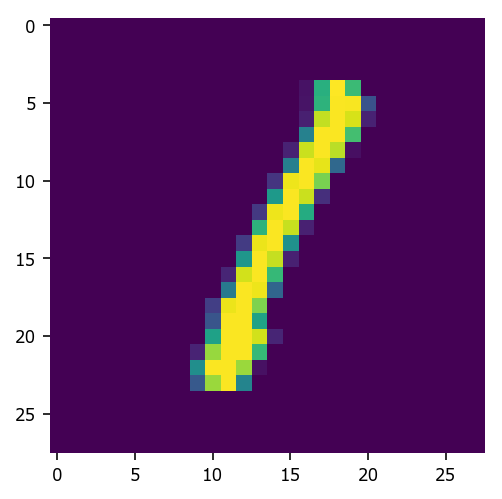

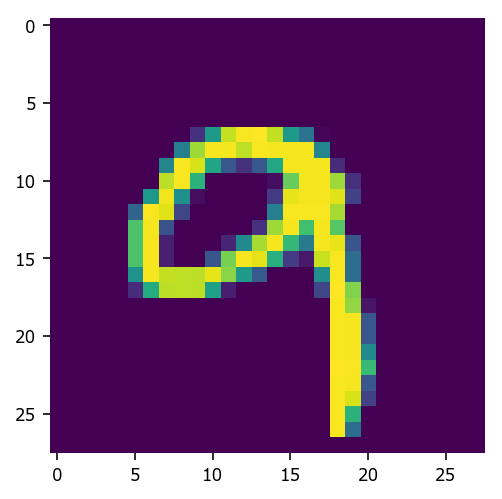

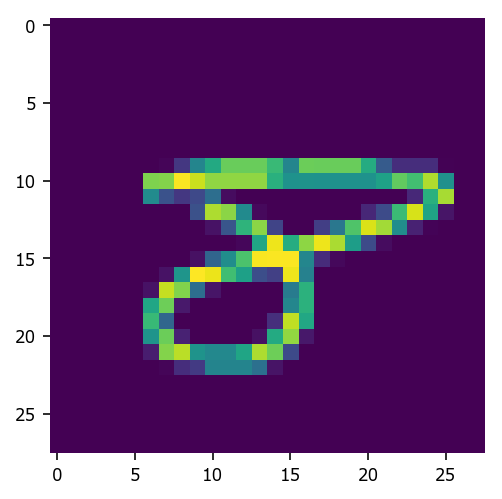

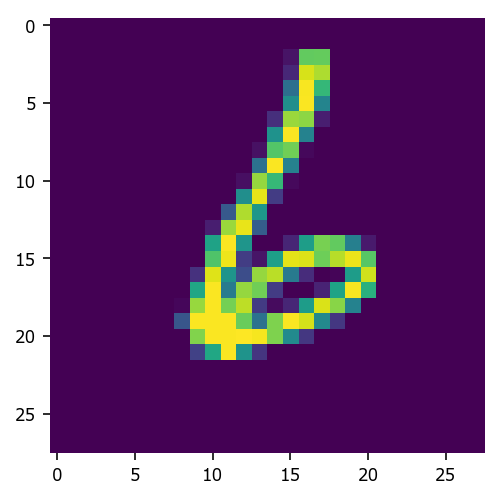

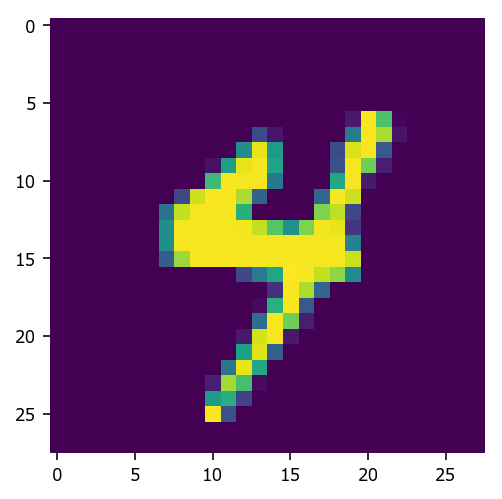

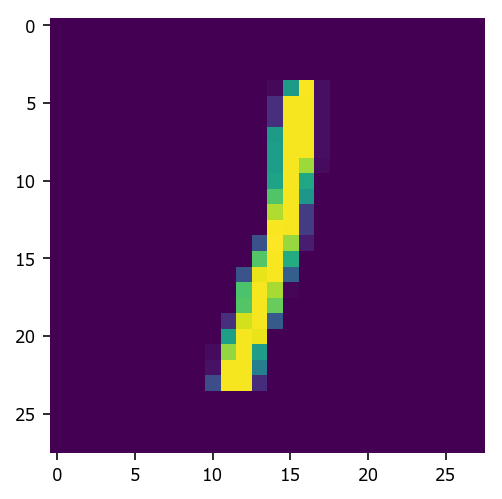

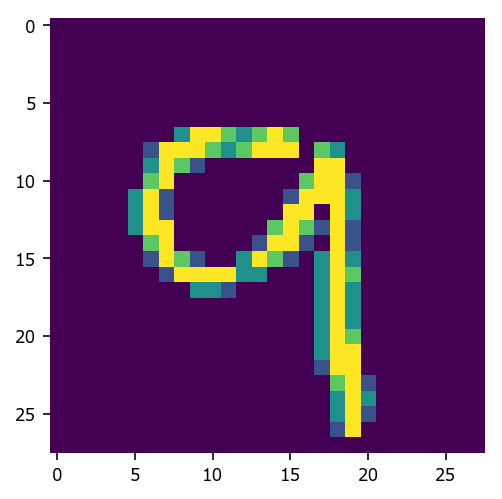

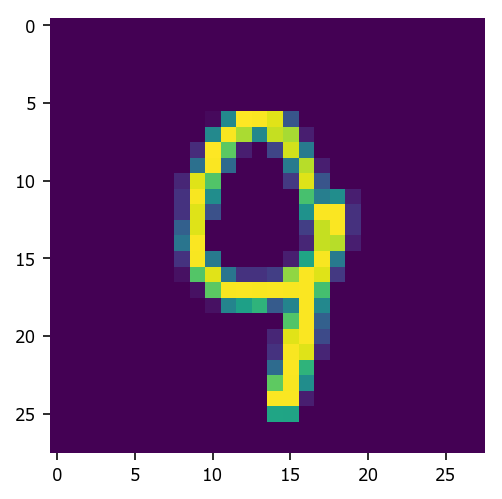

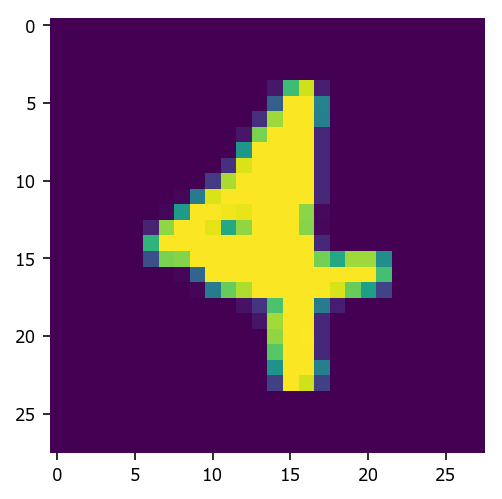

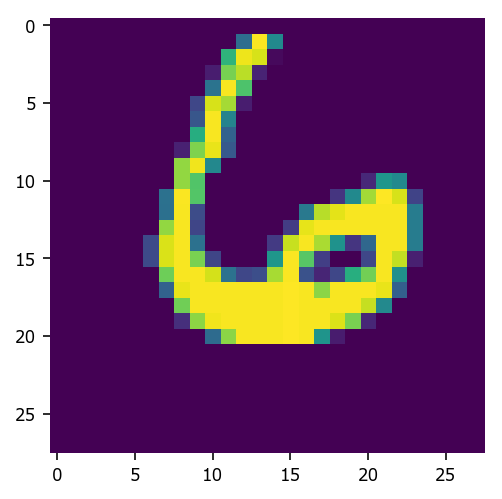

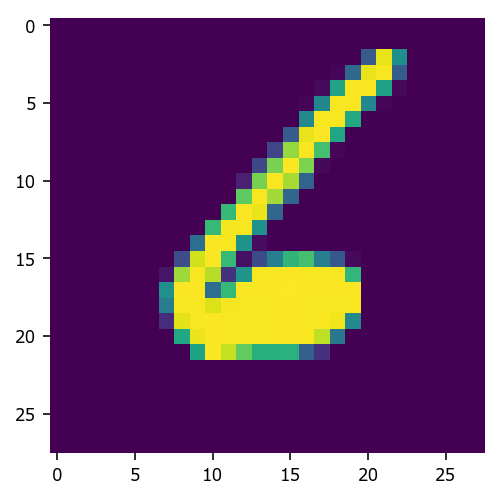

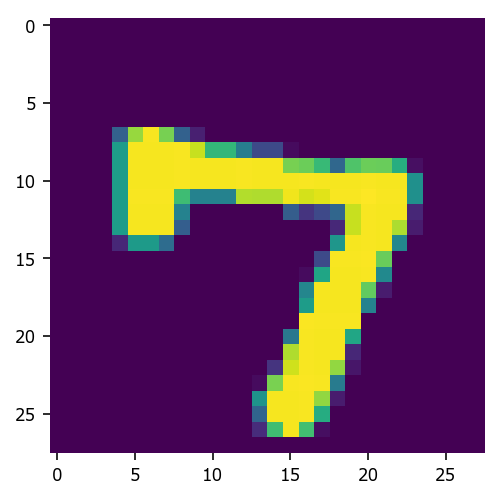

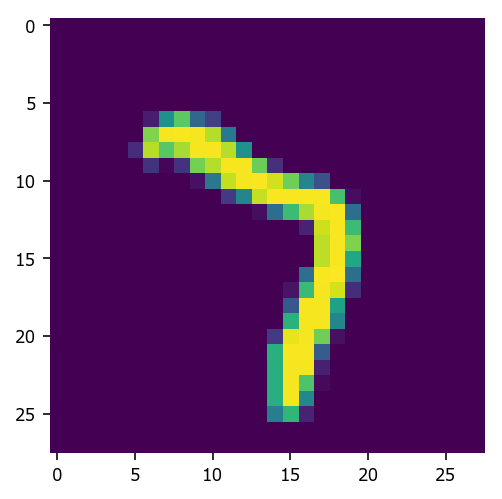

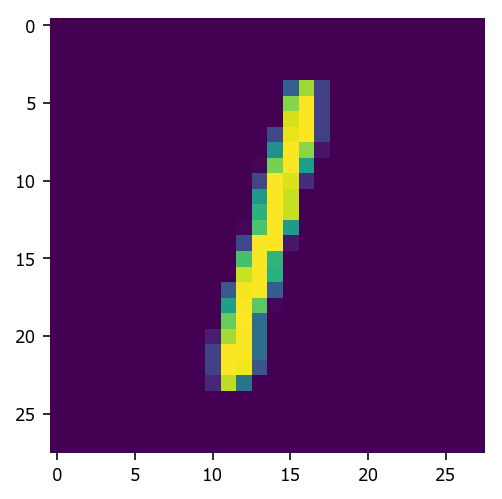

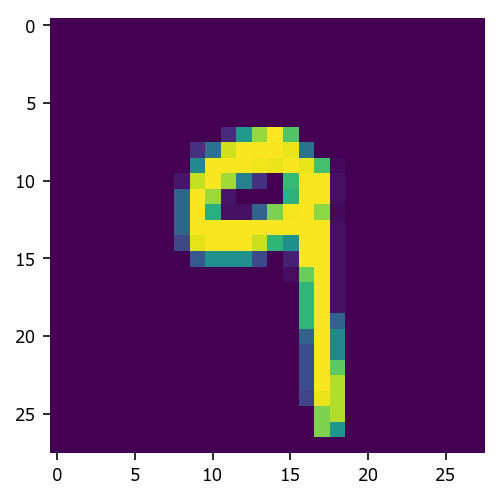

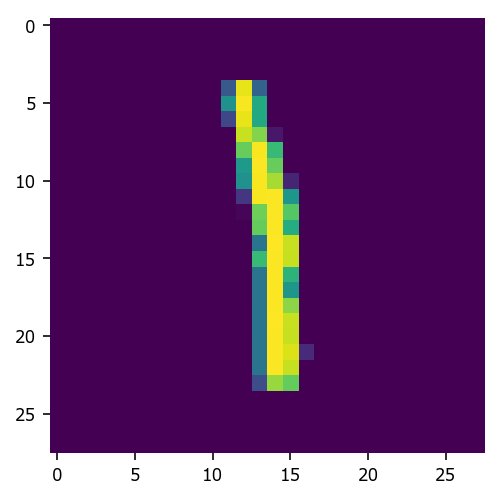

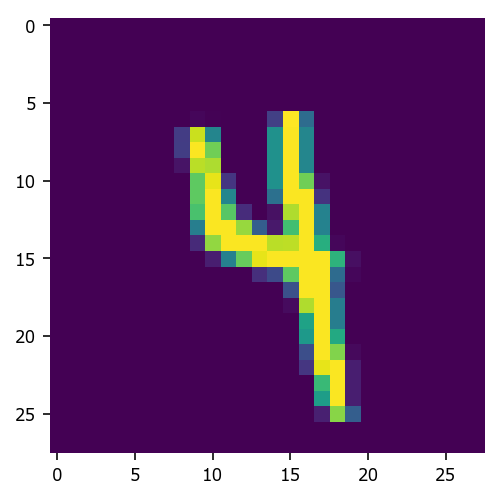

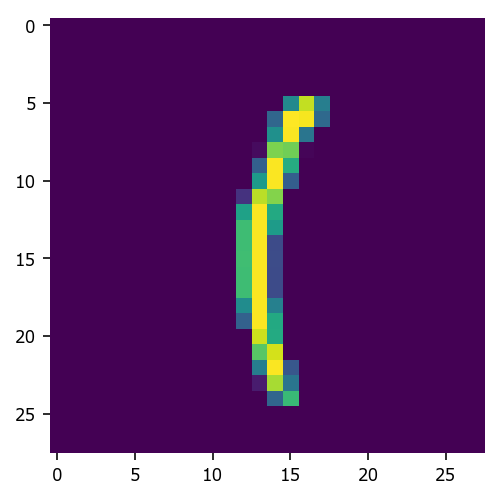

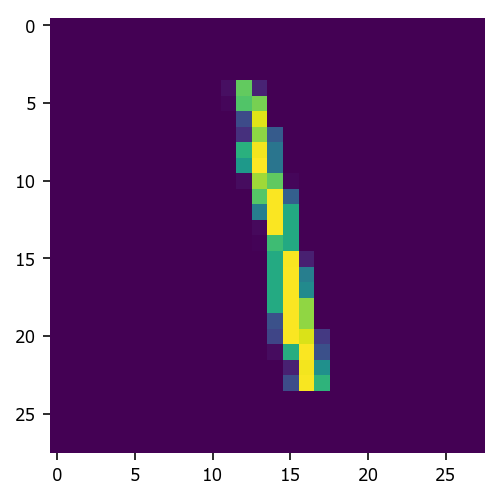

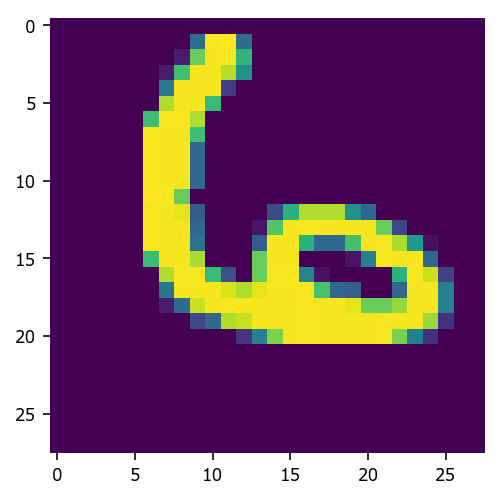

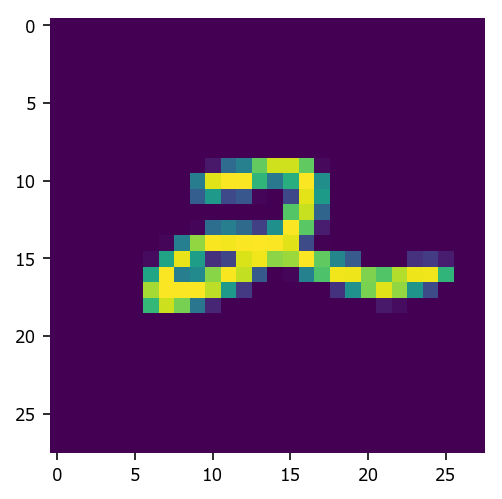

In [85]:
for i in cluster_d[0,:].argsort():
    plt.figure()
    plt.imshow(mnist.data[sample[i],:].reshape([28, -1]))

In [68]:
clusters = clustering.fit_predict(cluster_d)
clusters

array([ 0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  2,  3,  0,  0,  0,  4,  5,  4,  6,  0,  5,  0,  0,
        0,  0,  0,  7,  0,  0,  0,  0,  0,  0,  0,  8,  0,  0,  0,  0,  9,
        0,  0,  4,  0,  0,  0,  0,  0,  0,  0,  0,  0, 10,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, 11,  9,  5,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

In [69]:
len(set(clusters))

12

In [36]:
clustering.

array([], shape=(0, 100), dtype=float64)

In [221]:
%%time
move, res = ot.lp.emd(norm_mnist[0,:], norm_mnist[40002,:], d_flat, log=True)

CPU times: user 4.1 ms, sys: 3.01 ms, total: 7.11 ms
Wall time: 9.06 ms


In [184]:
res['cost']

2.6159351528940915

In [192]:
num_frames = 10

In [222]:
movie = np.zeros([28, 28, num_frames])

In [223]:
movie = np.zeros([28, 28, num_frames])
speed = 28*np.sqrt(2)/num_frames
for x, y in  list(zip(*np.nonzero(move))):
    x_vec = np.array([x // 28, x % 28])
    y_vec = np.array([y // 28, y % 28])
    
    vec_diff = y_vec - x_vec
    
    for i in range(num_frames):
        l1, l2 = np.round(x_vec + vec_diff*i/num_frames).astype(int)
        movie[l1, l2, i] += move[x,y]

In [188]:
max_frames

3.3881546358946921

In [189]:
movie = np.zeros([28, 28, num_frames])
speed = 28*np.sqrt(2)/num_frames / 3
for x, y in  list(zip(*np.nonzero(move))):
    x_vec = np.array([x // 28, x % 28])
    y_vec = np.array([y // 28, y % 28])
    
    vec_diff = y_vec - x_vec
    vec_norm = max(np.linalg.norm(vec_diff), 1e-3)
    vec_diff_u = vec_diff / vec_norm
    max_frames = vec_norm / speed
    
    for i in range(num_frames):
        l1, l2 = np.round(x_vec + speed * min(i, max_frames) * vec_diff_u).astype(int)
        movie[l1, l2, i] += move[x,y]

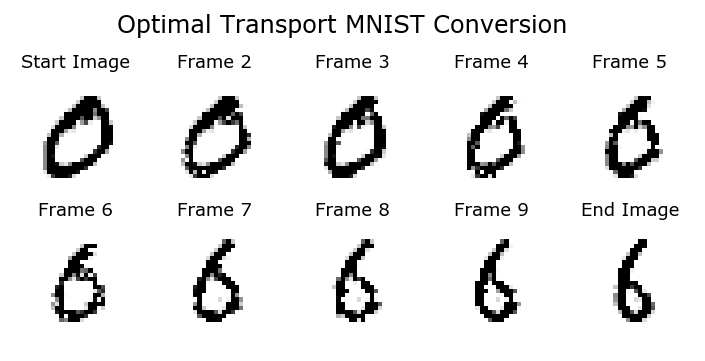

In [227]:
plt.figure(figsize=(6, 2.5))
for i in range(num_frames):
    plt.subplot(2, 5, i+1)
    plt.imshow(movie[:,:,i].reshape([28, 28]), vmin=0, vmax=1/200, cmap='Greys')
    plt.xticks([]); plt.yticks([]);
    title_text = 'Frame %i' % (i+1)
    if i == 0:
        title_text = 'Start Image'
    if i == 9:
        title_text = 'End Image'
    plt.title(title_text, fontdict={'fontsize': 9, 'fontweight': 'regular'})
title = plt.suptitle('Optimal Transport MNIST Conversion', y=1.05)
plt.savefig('ot-mnist-evol.pdf', dpi=300, bbox_inches='tight', bbox_extra_artists=[title])

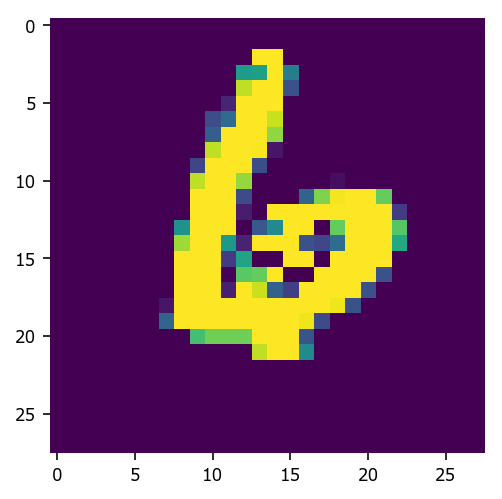

In [195]:
for i in range(num_frames):
    plt.imshow(movie[:,:,i].reshape([28, 28]), vmin=0, vmax=1/200)
    plt.savefig('movie/%i.png' %i, dpi=300)

# K-Means Clustering

In [96]:
def ot_d(v, w):
    if sum(v) == 0 or sum(w) == 0:
        return 1000
    v = v / v.sum()
    w = w / w.sum()
    move, res = ot.lp.emd(v, w, d_flat, log=True)
    return res['cost']

In [97]:
n_clusters = 10

In [103]:
clustering = KMeansClusterer(n_clusters, ot_d, repeats=5, avoid_empty_clusters=True)

In [104]:
labels = clustering.cluster(mnist.data[sample,:], assign_clusters=True, trace=True)

k-means trial 0
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
k-means trial 1
iteration
k-means trial 2
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
k-means trial 3
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
k-means trial 4
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration


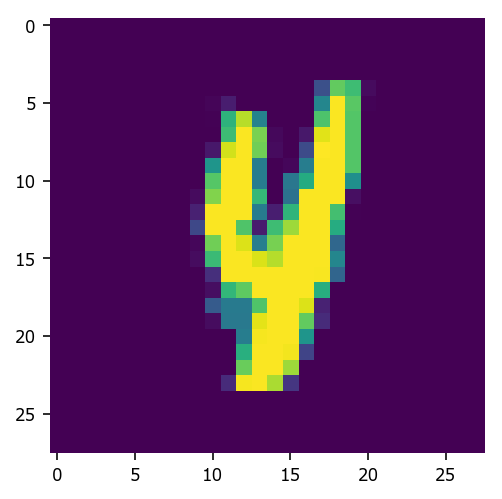

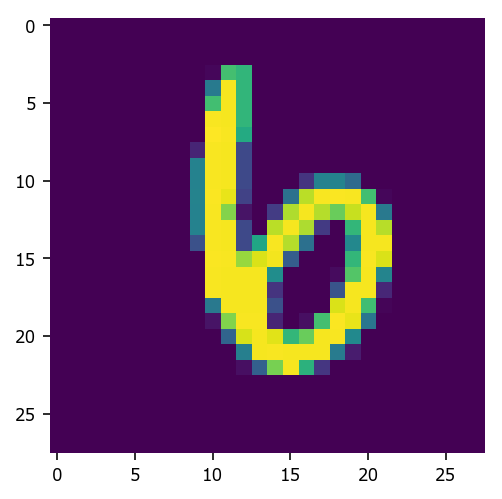

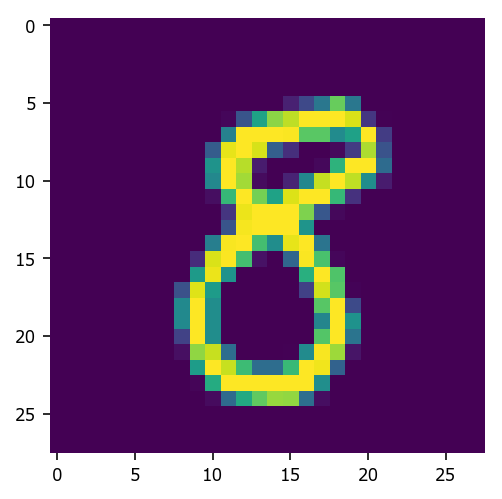

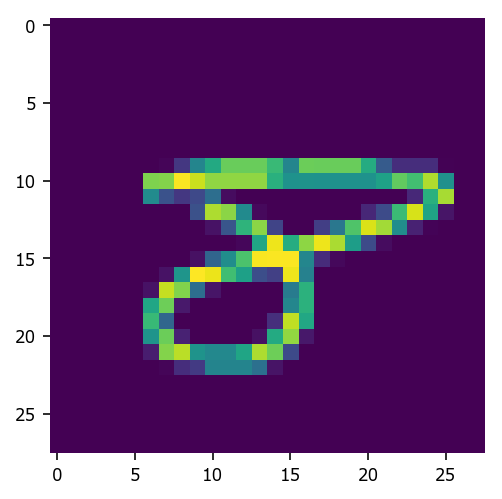

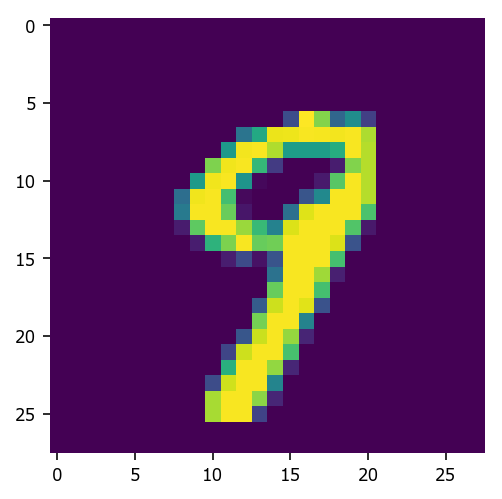

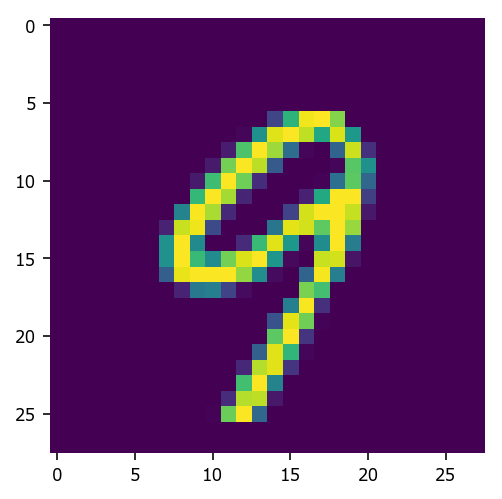

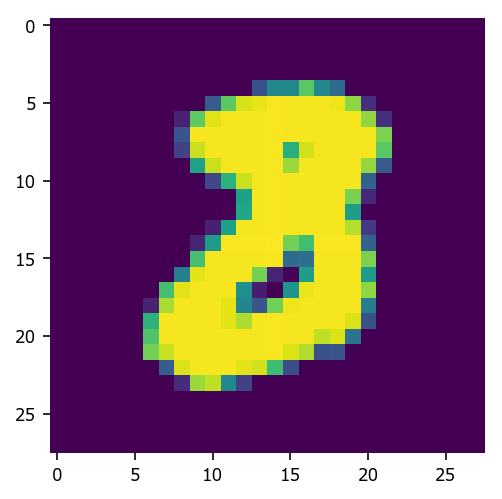

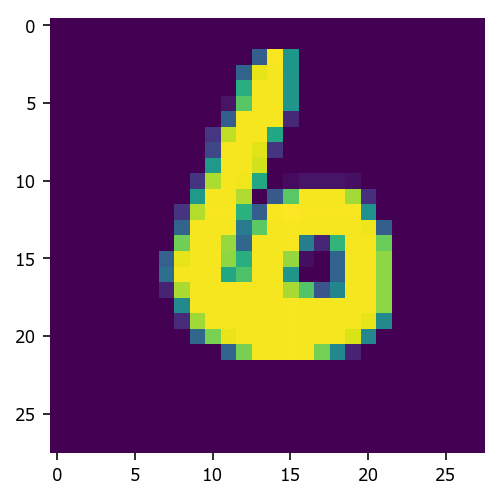

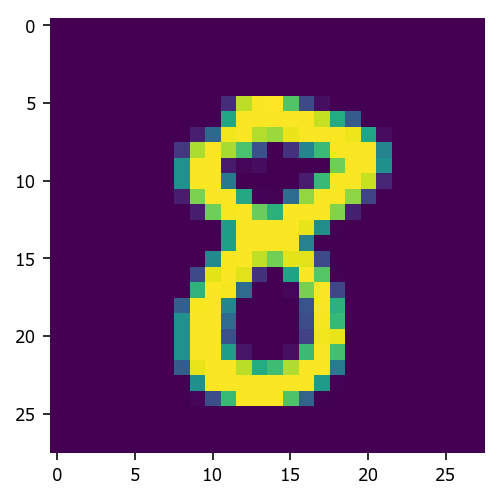

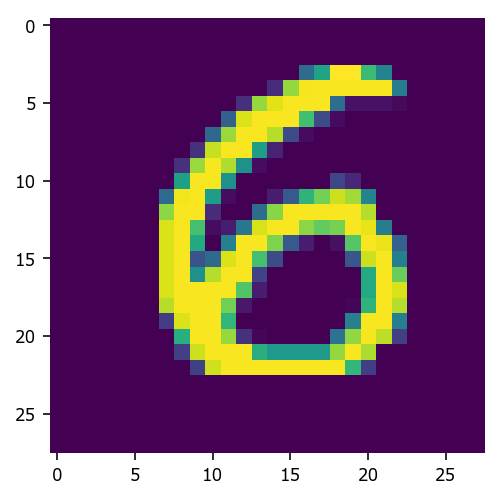

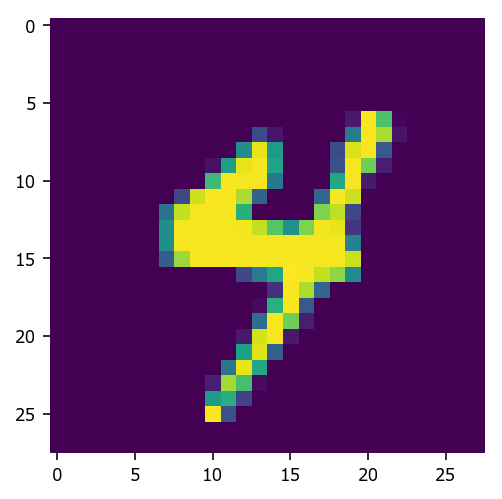

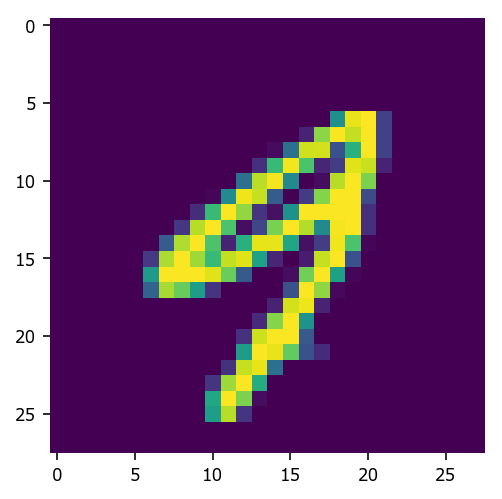

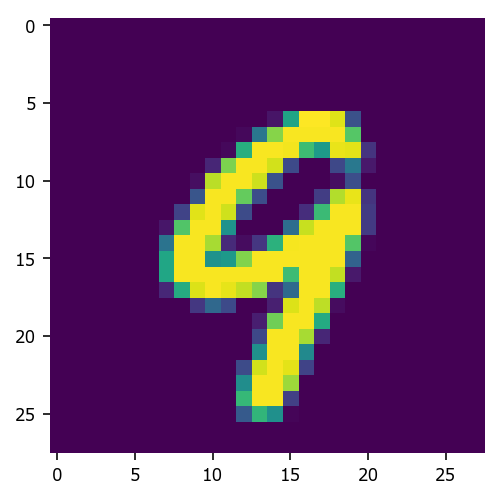

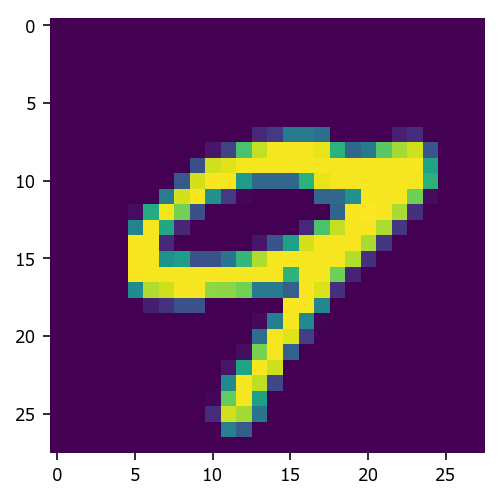

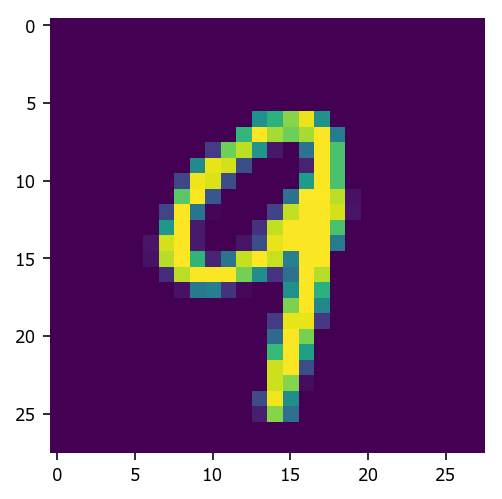

In [114]:
for i in range(sample_n):
    if labels[i] == 5:
        plt.figure()
        plt.imshow(mnist.data[sample[i],:].reshape([28, -1]))

# Performing transport on images

In [140]:
from skimage.restoration import denoise_bilateral
from scipy import ndimage
import scipy

In [154]:
kevin = 256 - scipy.misc.imread('imgs/kevin.jpg').mean(axis=2)
francisco = 256 - scipy.misc.imread('imgs/francisco.jpg').mean(axis=2)

kevin = scipy.misc.imresize(kevin, 0.25)
francisco = scipy.misc.imresize(francisco, 0.25)

kevin = kevin + 1e-2
francisco = francisco + 1e-2

kevin = kevin / kevin.sum()
francisco = francisco / francisco.sum()

In [142]:
shape = kevin.shape

In [143]:
shape[0] * shape[1] / (28**2)

5.219387755102041

In [144]:
np.prod(shape)

4092

In [145]:
%%time
x, y = np.meshgrid(range(shape[0]), range(shape[1]))
d = np.sqrt((x[:, :, np.newaxis, np.newaxis] - x)**2 + (y[:, :, np.newaxis, np.newaxis] - y)**2)
d_flat = d.reshape([np.prod(shape), np.prod(shape)])

CPU times: user 229 ms, sys: 225 ms, total: 454 ms
Wall time: 533 ms


In [70]:
%%time
move = ot.lp.emd(francisco.flatten(), kevin.flatten(), d_flat, numItermax=int(1e6))

CPU times: user 1.71 s, sys: 149 ms, total: 1.86 s
Wall time: 1.95 s


In [161]:
%%time
move = ot.sinkhorn(francisco.flatten(), kevin.flatten(), d_flat, 1, 
                   numItermax=100, 
                   method='sinkhorn_stabilized',
                  verbose=True)

It.  |Err         
-------------------
    0|1.218331e-04|
   20|5.583770e-06|
   40|5.273538e-04|
   60|5.273538e-04|
   80|5.273538e-04|
  100|5.273538e-04|
CPU times: user 31.4 s, sys: 6.77 s, total: 38.1 s
Wall time: 24.9 s


In [162]:
num_frames = 50

In [170]:
move = move - np.min(move)

(array([  1.67385190e+07,   4.70600000e+03,   7.95000000e+02,
          2.83000000e+02,   9.50000000e+01,   3.30000000e+01,
          2.60000000e+01,   5.00000000e+00,   0.00000000e+00,
          2.00000000e+00]),
 array([  0.00000000e+00,   1.50335538e-12,   3.00671077e-12,
          4.51006615e-12,   6.01342153e-12,   7.51677692e-12,
          9.02013230e-12,   1.05234877e-11,   1.20268431e-11,
          1.35301985e-11,   1.50335538e-11]),
 <a list of 10 Patch objects>)

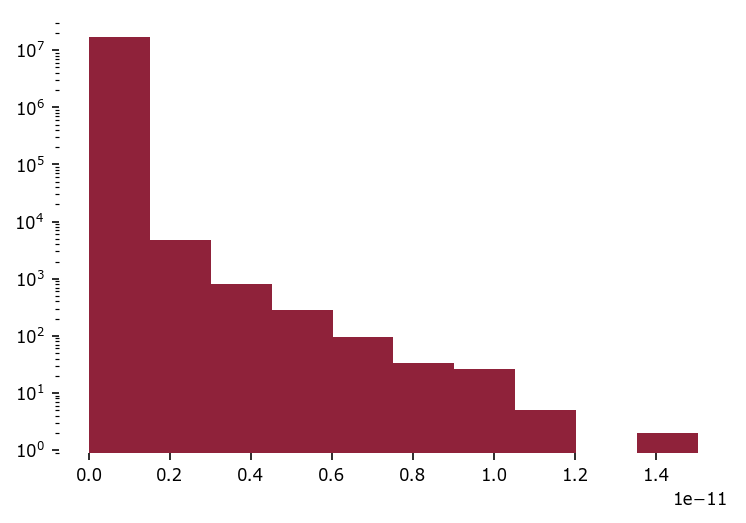

In [174]:
plt.hist(move.flatten(), log=True)

In [171]:
movie = np.zeros([*shape, num_frames])
for x, y in  tqdm(list(zip(*np.nonzero(move)))):
    x_vec = np.array([x // shape[1], x % shape[1]])
    y_vec = np.array([y // shape[1], y % shape[1]])
    
    vec_diff = y_vec - x_vec
    
    for i in range(num_frames):
        l1, l2 = np.round(x_vec + vec_diff*i/(num_frames-1)).astype(int)
        movie[l1, l2, i] += move[x,y]

HBox(children=(IntProgress(value=0, max=16744463), HTML(value='')))

KeyboardInterrupt: 

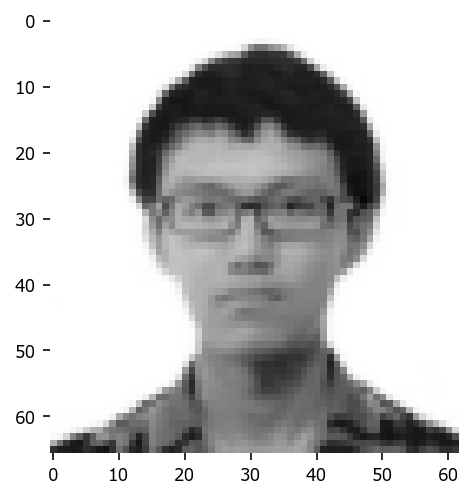

In [164]:
plt.imshow(kevin, vmin=0, vmax=1/1300, cmap='Greys')

In [ ]:
plt.imshow(movie[:,:,0].reshape(shape), vmin=0, vmax=1/1300, cmap='Greys')

In [ ]:
for i in range(num_frames):
    img = movie[:,:,i].reshape(shape)
    plt.imsave('img_mov/%i.png' %i, img, vmin=0, vmax=1/1300, cmap='Greys')
    #plt.savefig('img_mov/%i.png' %i, dpi=300)

In [64]:
kevin[0,0]

0.00035797562677320768